In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned/nyc_taxi_cleaned.csv", parse_dates=['pickup_datetime'])

In [3]:
df.head()

,id,vendor_id,pickup_datetime,pickup_hour,pickup_weekday,is_weekend,passenger_count,trip_distance_km,trip_duration
0,id2875421,2,2016-03-14 17:24:55,17,Monday,0,1,1.498521,455
1,id2377394,1,2016-06-12 00:43:35,0,Sunday,1,1,1.805507,663
2,id3858529,2,2016-01-19 11:35:24,11,Tuesday,0,1,6.385098,2124
3,id3504673,2,2016-04-06 19:32:31,19,Wednesday,0,1,1.485498,429
4,id2181028,2,2016-03-26 13:30:55,13,Saturday,1,1,1.188588,435


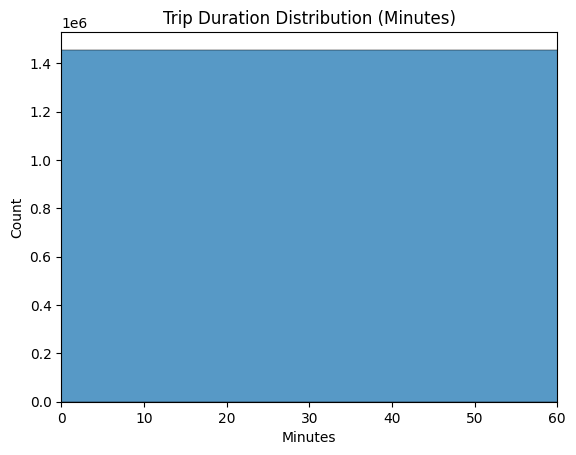

In [10]:
df['trip_duration_min'] = df['trip_duration'] / 60

plt.figure()
sns.histplot(df['trip_duration_min'], bins=100)
plt.xlim(0, 60)   # focus on realistic trips
plt.title("Trip Duration Distribution (Minutes)")
plt.xlabel("Minutes")
plt.show()

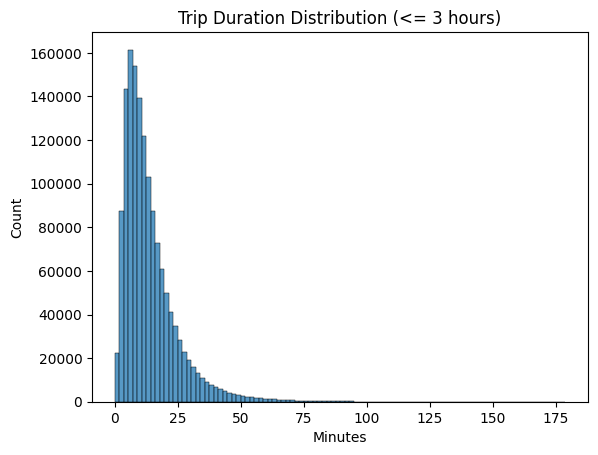

In [11]:
df_filtered = df[df['trip_duration_min'] <= 180]

plt.figure()
sns.histplot(df_filtered['trip_duration_min'], bins=100)
plt.title("Trip Duration Distribution (<= 3 hours)")
plt.xlabel("Minutes")
plt.show()


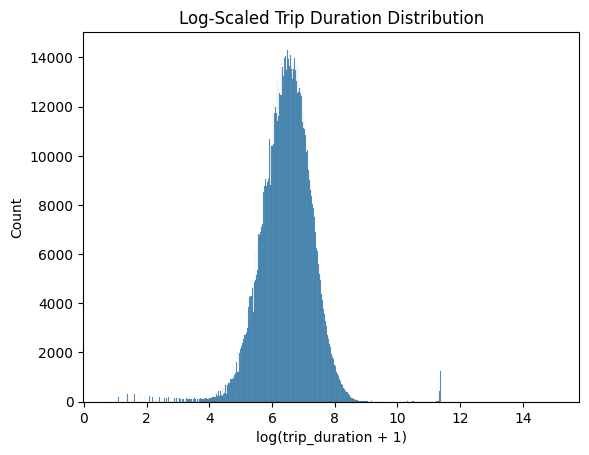

In [14]:
plt.figure()
sns.histplot(np.log1p(df['trip_duration']))
plt.title("Log-Scaled Trip Duration Distribution")
plt.xlabel("log(trip_duration + 1)")
plt.show()

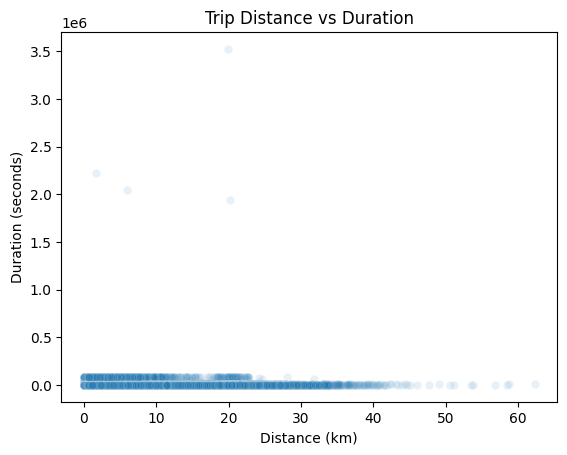

In [5]:
plt.figure()
sns.scatterplot(
    x=df['trip_distance_km'],
    y=df['trip_duration'],
    alpha=0.1
)
plt.title("Trip Distance vs Duration")
plt.xlabel("Distance (km)")
plt.ylabel("Duration (seconds)")
plt.show()


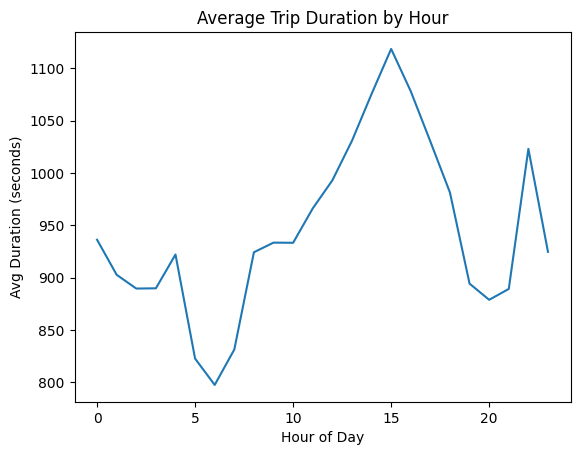

In [6]:
hourly_avg = df.groupby('pickup_hour')['trip_duration'].mean()

plt.figure()
hourly_avg.plot(kind='line')
plt.title("Average Trip Duration by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Duration (seconds)")
plt.show()


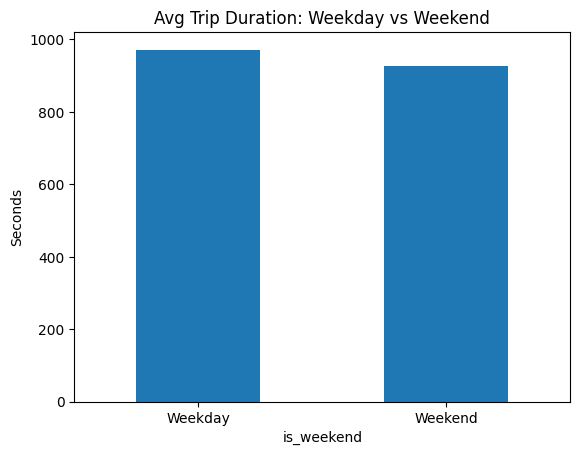

In [7]:
weekend_avg = df.groupby('is_weekend')['trip_duration'].mean()

plt.figure()
weekend_avg.plot(kind='bar')
plt.title("Avg Trip Duration: Weekday vs Weekend")
plt.xticks([0,1], ['Weekday', 'Weekend'], rotation=0)
plt.ylabel("Seconds")
plt.show()


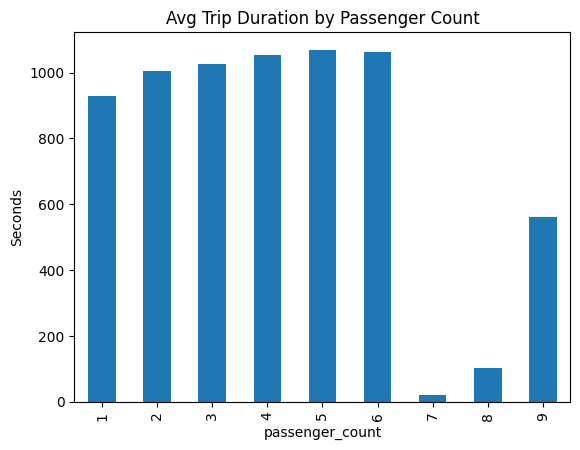

In [8]:
passenger_avg = df.groupby('passenger_count')['trip_duration'].mean()

plt.figure()
passenger_avg.plot(kind='bar')
plt.title("Avg Trip Duration by Passenger Count")
plt.ylabel("Seconds")
plt.show()


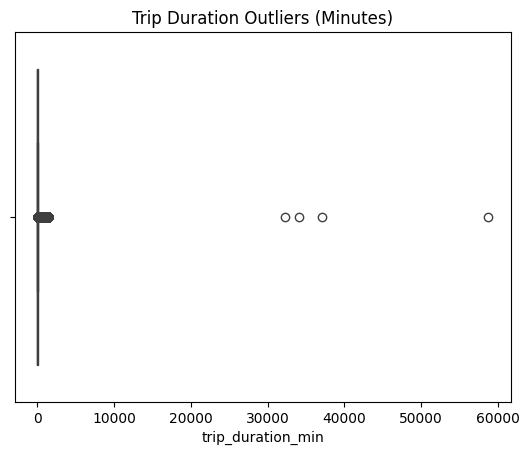

In [9]:
df['trip_duration_min'] = df['trip_duration'] / 60

plt.figure()
sns.boxplot(x=df['trip_duration_min'])
plt.title("Trip Duration Outliers (Minutes)")
plt.show()
